In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from datetime import datetime

Lodaing data into google colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Loading weather dataset 

In [ ]:
df='/content/drive/My Drive/'
wet_data=pd.read_csv(df+'weatherHistory.csv')

Now checking the Dataset into more details

In [ ]:
wet_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
wet_data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


In [ ]:
wet_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
wet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


#Data Preparation & Cleaning

**Now,check for any null values or unnecessary values**

In [ ]:
wet_data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Formatted Date  Summary  Precip Type  Temperature (C)  \
0               False    False        False            False   
1               False    False        False            False   
2               False    False        False            False   
3               False    False        False            False   
4               False    False        False            False   
...               ...      ...          ...              ...   
96448           False    False        False            False   
96449           False    False        False            False   
96450           False    False        False            False   
96451           False    False        False            False   
96452           False    False        False            False   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                         False     False              False   
1                         False     False

In [ ]:
wet_data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
titles_req=['Formatted Date','Apparent Temperature (C)','Humidity','Summary']
wet_data=wet_data[titles_req]

In [ ]:
wet_data.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)

**We have convert formatted date to datetype object**

In [ ]:
#Using infer datetime it will automaticall detect format and convert the column to datetime
#df['Formatted Date']=pd.to_datetime(df['Formatted Date'],infer_datetime_format=True)
wet_data['Formatted Date']=pd.to_datetime(wet_data['Formatted Date'],utc=True)

In [ ]:
wet_data.dtypes

Formatted Date          datetime64[ns, UTC]
Apparent Temperature                float64
Humidity                            float64
Summary                              object
dtype: object

**After converting object to datetime.**

In [ ]:
wet_data.head()

,Formatted Date,Apparent Temperature,Humidity,Summary
0,2006-03-31 22:00:00+00:00,7.388889,0.89,Partly Cloudy
1,2006-03-31 23:00:00+00:00,7.227778,0.86,Partly Cloudy
2,2006-04-01 00:00:00+00:00,9.377778,0.89,Mostly Cloudy
3,2006-04-01 01:00:00+00:00,5.944444,0.83,Partly Cloudy
4,2006-04-01 02:00:00+00:00,6.977778,0.83,Mostly Cloudy


In [ ]:
wet_data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
wet_data=wet_data.set_index('Formatted Date')
wet_data.head()

,Apparent Temperature,Humidity,Summary
Formatted Date,,,
2006-03-31 22:00:00+00:00,7.388889,0.89,Partly Cloudy
2006-03-31 23:00:00+00:00,7.227778,0.86,Partly Cloudy
2006-04-01 00:00:00+00:00,9.377778,0.89,Mostly Cloudy
2006-04-01 01:00:00+00:00,5.944444,0.83,Partly Cloudy
2006-04-01 02:00:00+00:00,6.977778,0.83,Mostly Cloudy


**Now, here data is in hourly period of time. so, for better analysis we need to resample our data in monthly.**

In [ ]:
wet_data_month=wet_data[['Apparent Temperature','Humidity',]].resample('M').mean()
wet_data_month.head()

,Apparent Temperature,Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


#Data Visualization

**Visulizing the data now**

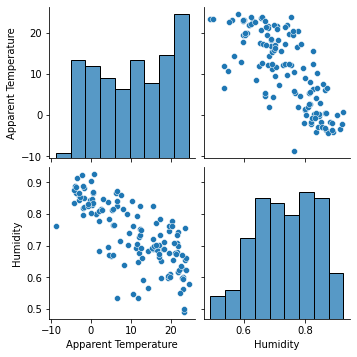

In [ ]:
sns.pairplot(wet_data_month,kind='scatter')
plt.show()

**Observation**

There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.

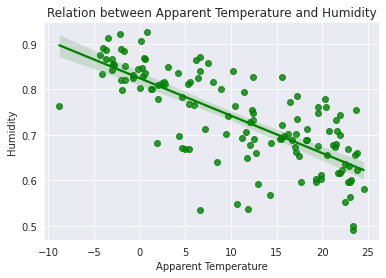

In [ ]:
sns.set_style("darkgrid")
sns.regplot(data=wet_data_month, x="Apparent Temperature", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature and Humidity")
plt.show()

**Correlation Between Apparent Temperature & Humidity**

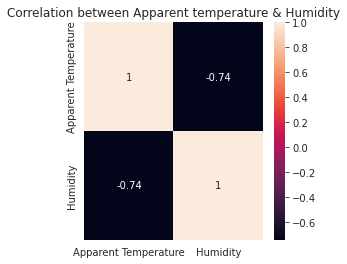

In [ ]:
# Pair plot for correlation of Apparent temperature & Humidity
sns.set_style('darkgrid')
plt.figure(figsize=(4,4))
plt.title('Correlation between Apparent temperature & Humidity')
sns.heatmap(data=wet_data_month.corr(), annot=True)
plt.show()

**Apparent Temperature and Humidity with year**

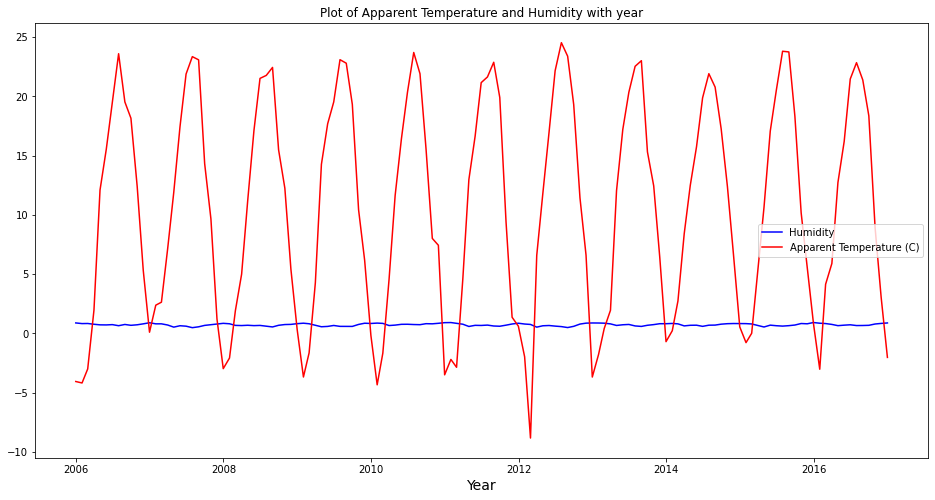

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year")
plt.plot(wet_data_month['Humidity'],label='Humidity',color='Blue')
plt.plot(wet_data_month['Apparent Temperature'],label='Apparent Temperature (C)',color='Red')
plt.xlabel("Year",fontsize="14")
plt.legend(loc=5,fontsize=10)

** We need to find whether the for the month of a month say April starting from 2006 to 2016 and the for the same period have increased or not.**

In [ ]:
April=wet_data_month[wet_data_month.index.month==4]

In [ ]:
April

,Apparent Temperature,Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.782770,0.650222
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


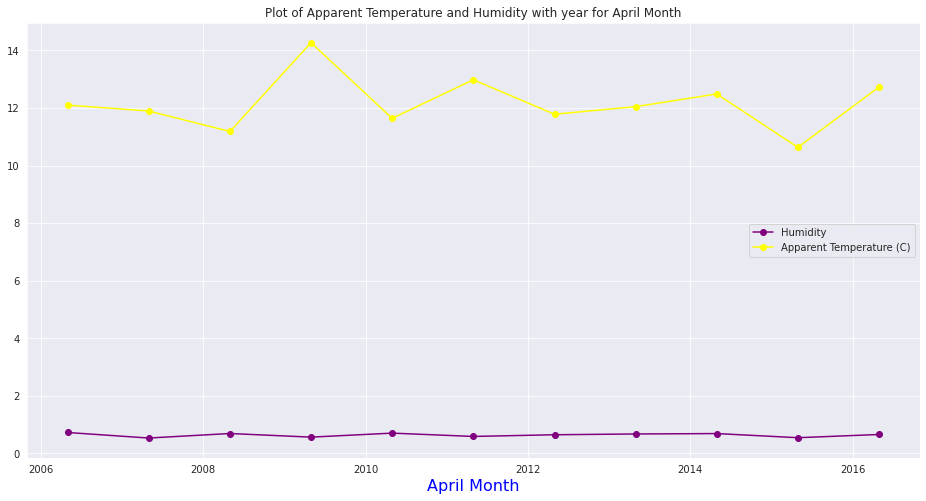

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(April['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(April['Apparent Temperature'],label='Apparent Temperature (C)',color='yellow',marker='o')
plt.xlabel('April Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

According to visulization of April month graph for year 2006 to 2016, the average humidity for all period is same. it not increasing nor descreasing. But there is vast change in temperature for 2008, 2009 and 2015 year majorly.



**This monthly analysis has to be done for all 12 months over the 10 year period. So basically after resampling data from hourly to monthly, then comparing the same month over the 10 year period.**

In [ ]:
jan=wet_data_month[wet_data_month.index.month==1]
feb=wet_data_month[wet_data_month.index.month==2]
march=wet_data_month[wet_data_month.index.month==3]
april=wet_data_month[wet_data_month.index.month==4]
may=wet_data_month[wet_data_month.index.month==5]
june=wet_data_month[wet_data_month.index.month==6]
july=wet_data_month[wet_data_month.index.month==7]
august=wet_data_month[wet_data_month.index.month==8]
sept=wet_data_month[wet_data_month.index.month==9]
octo=wet_data_month[wet_data_month.index.month==10]
nov=wet_data_month[wet_data_month.index.month==11]
dec=wet_data_month[wet_data_month.index.month==12]

 **Plot of Humidity for all year based on month**

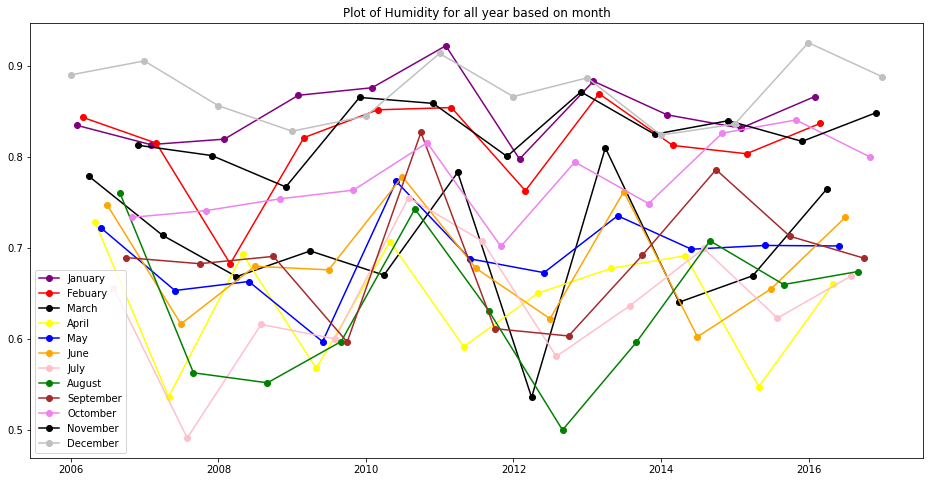

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Humidity for all year based on month")
plt.plot(jan['Humidity'],label='January',color='Purple',marker='o')
plt.plot(feb['Humidity'],label='Febuary',color='red',marker='o')
plt.plot(march['Humidity'],label='March',color='black',marker='o')
plt.plot(april['Humidity'],label='April',color='yellow',marker='o')
plt.plot(may['Humidity'],label='May',color='blue',marker='o')
plt.plot(june['Humidity'],label='June',color='orange',marker='o')
plt.plot(july['Humidity'],label='July',color='pink',marker='o')
plt.plot(august['Humidity'],label='August',color='green',marker='o')
plt.plot(sept['Humidity'],label='September',color='brown',marker='o')
plt.plot(octo['Humidity'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Humidity'],label='November',color='black',marker='o')
plt.plot(dec['Humidity'],label='December',color='silver',marker='o')



plt.legend(loc=0,fontsize=10)

**Plot of Average apparent temperature for all year based on month**

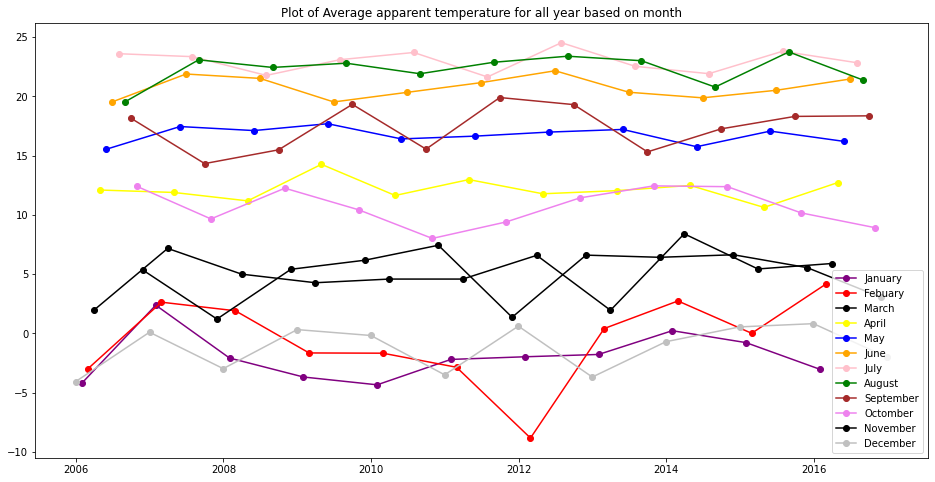

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Average apparent temperature for all year based on month")
plt.plot(jan['Apparent Temperature'],label='January',color='Purple',marker='o')
plt.plot(feb['Apparent Temperature'],label='Febuary',color='red',marker='o')
plt.plot(march['Apparent Temperature'],label='March',color='black',marker='o')
plt.plot(april['Apparent Temperature'],label='April',color='yellow',marker='o')
plt.plot(may['Apparent Temperature'],label='May',color='blue',marker='o')
plt.plot(june['Apparent Temperature'],label='June',color='orange',marker='o')
plt.plot(july['Apparent Temperature'],label='July',color='pink',marker='o')
plt.plot(august['Apparent Temperature'],label='August',color='green',marker='o')
plt.plot(sept['Apparent Temperature'],label='September',color='brown',marker='o')
plt.plot(octo['Apparent Temperature'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Apparent Temperature'],label='November',color='black',marker='o')
plt.plot(dec['Apparent Temperature'],label='December',color='silver',marker='o')

plt.legend(loc=0,fontsize=10)

**Ploting of individual month for humidity and temperature**

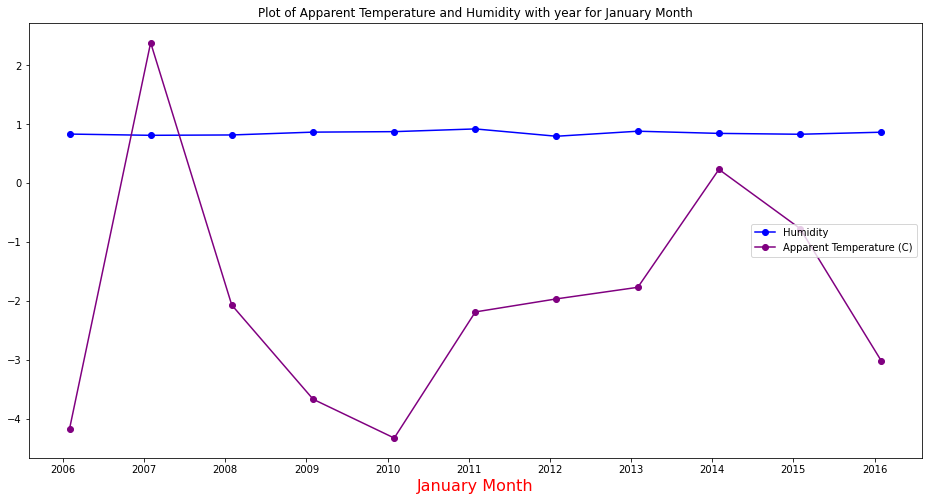

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for January Month")
plt.plot(jan['Humidity'],label='Humidity',color='Blue',marker='o')
plt.plot(jan['Apparent Temperature'],label='Apparent Temperature (C)',color='purple',marker='o')
plt.xlabel('January Month',fontsize=16,color='Red')
plt.legend(loc=5,fontsize=10)

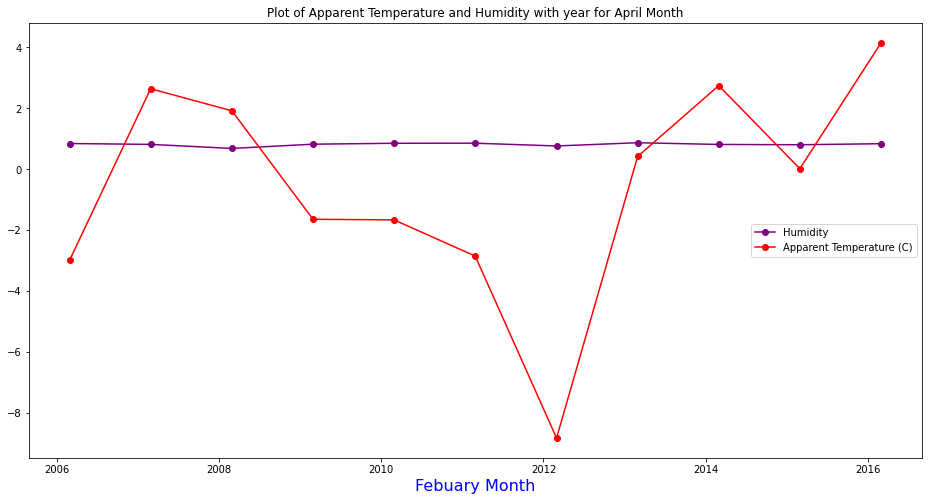

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(feb['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(feb['Apparent Temperature'],label='Apparent Temperature (C)',color='red',marker='o')
plt.xlabel('Febuary Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

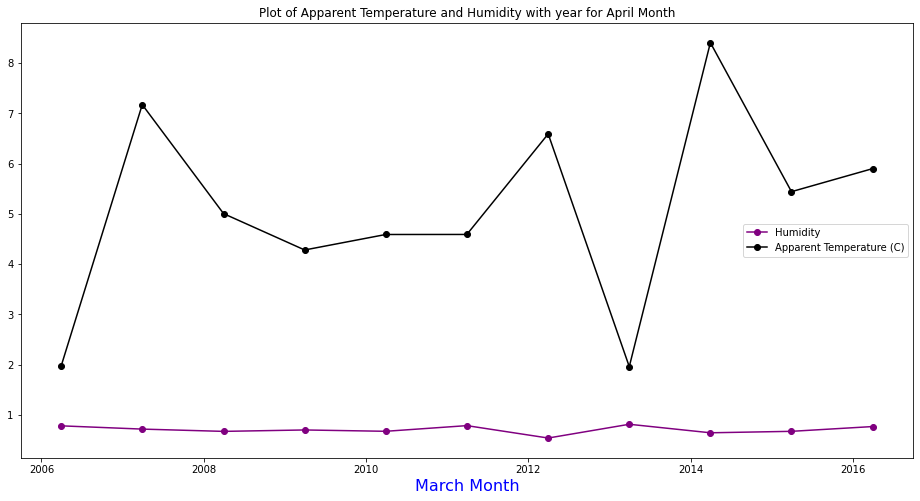

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(march['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(march['Apparent Temperature'],label='Apparent Temperature (C)',color='black',marker='o')
plt.xlabel('March Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

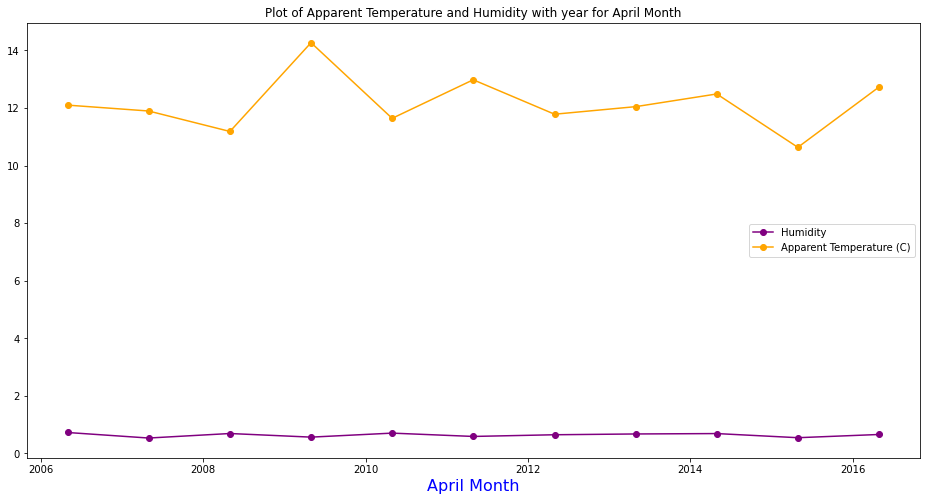

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(april['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(april['Apparent Temperature'],label='Apparent Temperature (C)',color='orange',marker='o')
plt.xlabel('April Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

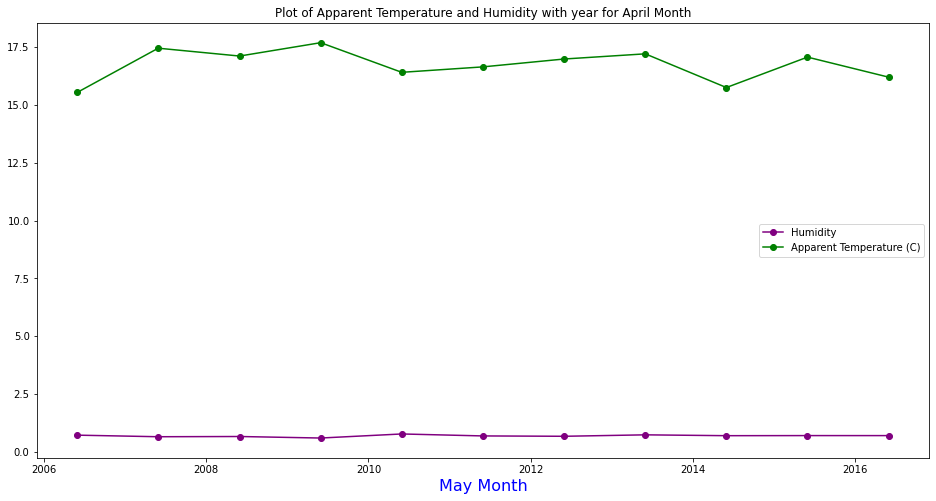

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(may['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(may['Apparent Temperature'],label='Apparent Temperature (C)',color='green',marker='o')
plt.xlabel('May Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

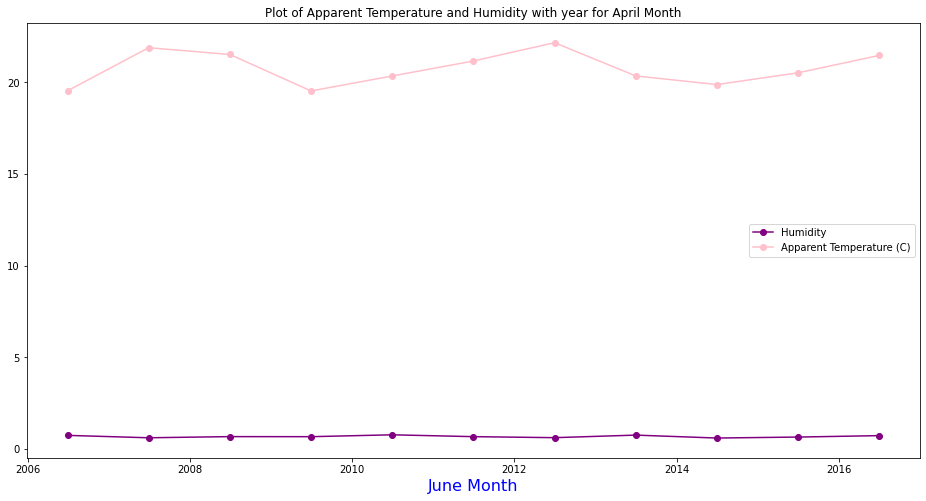

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(june['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(june['Apparent Temperature'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('June Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

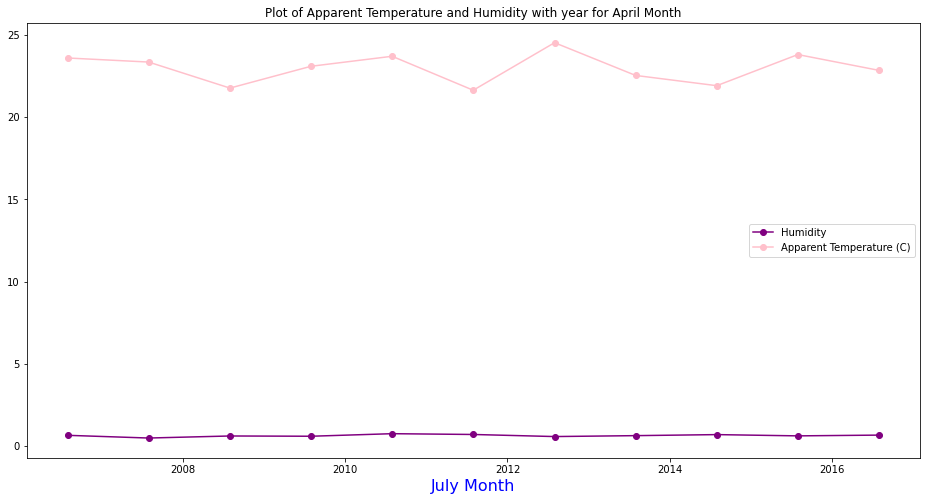

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(july['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(july['Apparent Temperature'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('July Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

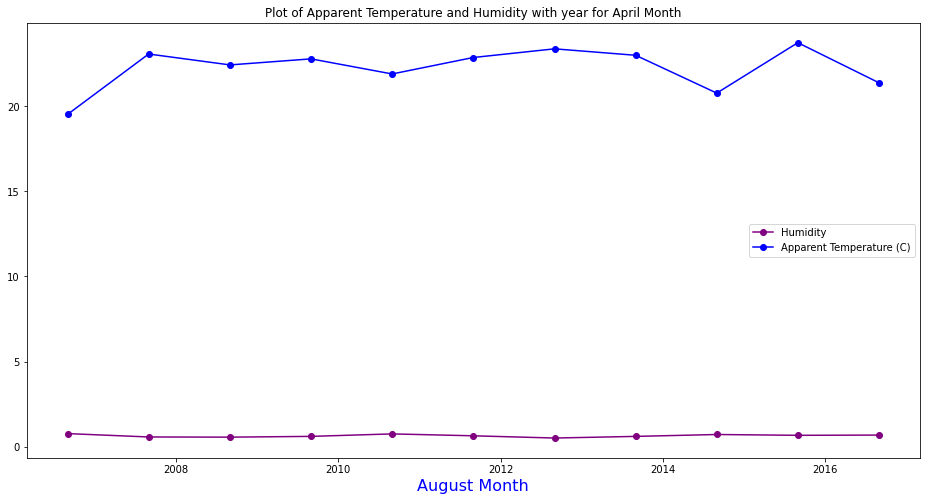

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(august['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(august['Apparent Temperature'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('August Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

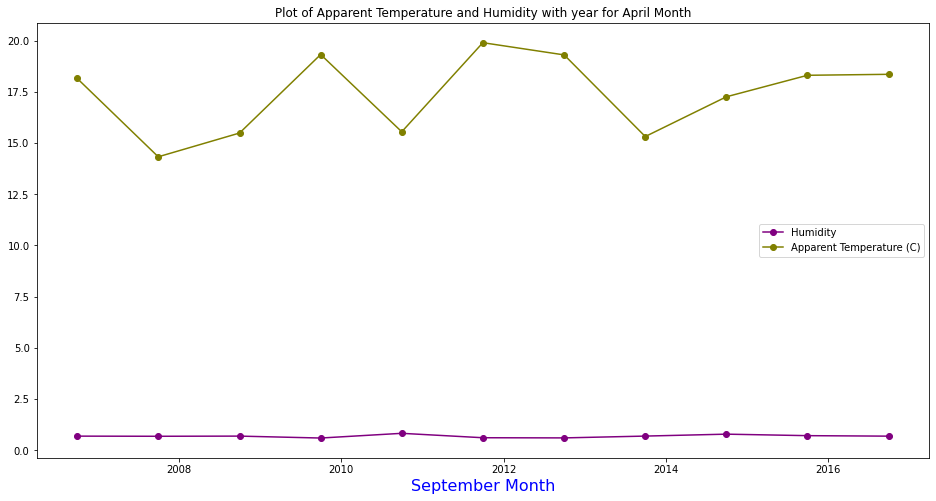

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(sept['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(sept['Apparent Temperature'],label='Apparent Temperature (C)',color='olive',marker='o')
plt.xlabel('September Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

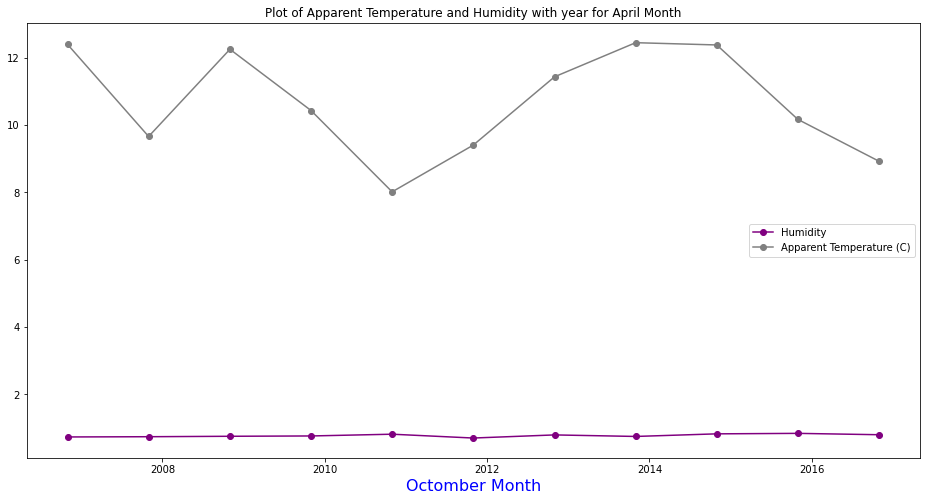

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(octo['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(octo['Apparent Temperature'],label='Apparent Temperature (C)',color='grey',marker='o')
plt.xlabel('Octomber Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

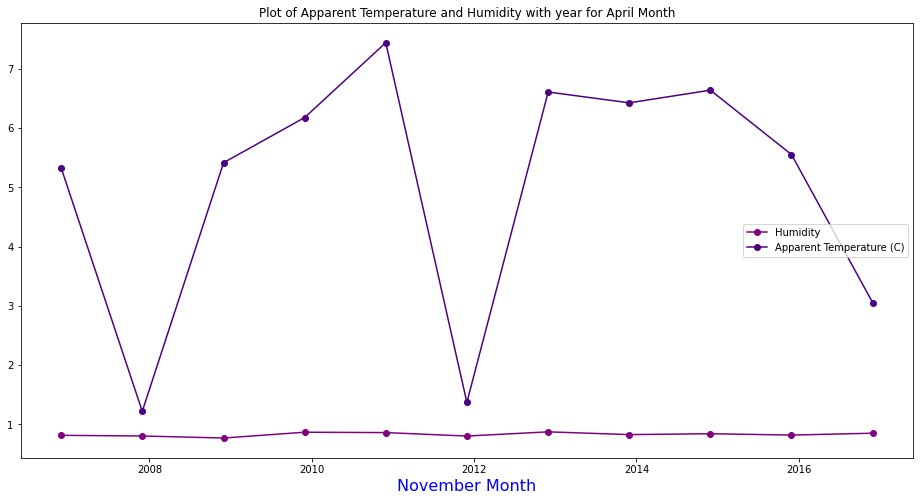

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(nov['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(nov['Apparent Temperature'],label='Apparent Temperature (C)',color='indigo',marker='o')
plt.xlabel('November Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

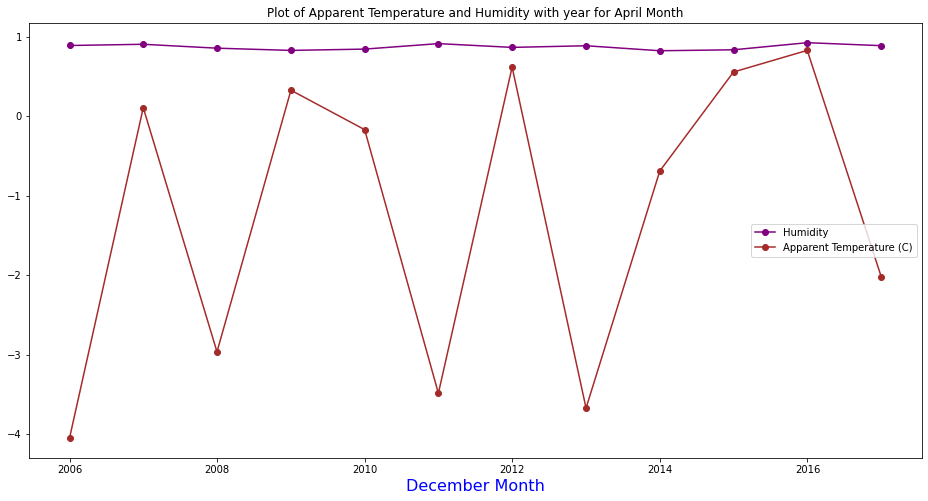

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(dec['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(dec['Apparent Temperature'],label='Apparent Temperature (C)',color='brown',marker='o')
plt.xlabel('December Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

#**Conclusion:**

* According to Jan-Dec graph visulization, april to august month's temprature change is very less. Its almost same for all year.But there is no change in humidity for last 10 year[2006-2016]for a perticular month.Again september to march, there is very change in temperature but humidity is unchanged.

* Global warming is no doubt deteriorating the climate and is affecting various parameters of the environment. Hence from this analysis, we infer that there is  major difference and unreliability in temperature predictability due to "Global Warming".

* Average Apparent Temperature (c) increase for year 2008-09 and then again decrease from 2009-10 to its average level. Then slighlty increase for period 2010-11 and then drop again for year 2011-12. For year 2014-15 it decrease drastically and then come to average level for year 2015-16.

* It observed, for year 2009 the Apparent Temperature is at Highest 14.26(C) and for year 2015 the Apparent Temperature is at lowest 10.63(C).

* There is no any change in average Humidity for given year 2006-2016. The humidity graph line is approximately parallel to the X-axis.